# HR Analytics for Datascience job change


## Data and Libraries importing

In [1]:
#importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_train1 = pd.read_csv('C:/Users/M.S.Chandrashekar/Desktop/Python/Kaggle_DS/archive/aug_train.csv')

df_train1.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


In [3]:
df_train1.columns

Index(['enrollee_id', 'city', 'city_development_index', 'gender',
       'relevent_experience', 'enrolled_university', 'education_level',
       'major_discipline', 'experience', 'company_size', 'company_type',
       'last_new_job', 'training_hours', 'target'],
      dtype='object')

## Data Wrangling

In [6]:
df_train1['gender'] = df_train1['gender'].fillna('Male')

In [7]:
#One hot encoding - Gender 

df_train1[['F','M','O']] = pd.get_dummies(df_train1['gender'])

df_train1.head()

df_train1[['F','M','O']].value_counts()

F  M  O
0  1  0    17729
1  0  0     1238
0  0  1      191
dtype: int64

In [8]:
df_train1['enrolled_university'].isna().value_counts()

False    18772
True       386
Name: enrolled_university, dtype: int64

In [9]:
#Fill NA's with Frequent values

df_train1['enrolled_university'] = df_train1['enrolled_university'].fillna('no_enrollment')

df_train1['enrolled_university'].value_counts()

no_enrollment       14203
Full time course     3757
Part time course     1198
Name: enrolled_university, dtype: int64

In [10]:
#One hot encoding - Enrolled Univeristy Full/Part/No enrollment

df_train1[['EU_2','EU_1','EU_0']] = pd.get_dummies(df_train1['enrolled_university'])

df_train1.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target,F,M,O,EU_2,EU_1,EU_0
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0,0,1,0,0,0,1
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0,0,1,0,0,0,1
2,11561,city_21,0.624,Male,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0,0,1,0,1,0,0
3,33241,city_115,0.789,Male,No relevent experience,no_enrollment,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0,0,1,0,0,0,1
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0,0,1,0,0,0,1


In [11]:
df_train1['education_level'].value_counts()

Graduate          11598
Masters            4361
High School        2017
Phd                 414
Primary School      308
Name: education_level, dtype: int64

In [12]:
#Fill NA's with min education level - Minimum of HighSchool

df_train1['education_level'] = df_train1['education_level'].fillna('High School')

df_train1['education_level'].value_counts()

Graduate          11598
Masters            4361
High School        2477
Phd                 414
Primary School      308
Name: education_level, dtype: int64

In [13]:
#One hot encoding - relative experience

df_train1[['rel_exp_1','rel_exp_0']] = pd.get_dummies(df_train1['relevent_experience'])

df_train1.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,...,training_hours,target,F,M,O,EU_2,EU_1,EU_0,rel_exp_1,rel_exp_0
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,...,36,1.0,0,1,0,0,0,1,1,0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,...,47,0.0,0,1,0,0,0,1,0,1
2,11561,city_21,0.624,Male,No relevent experience,Full time course,Graduate,STEM,5,NaN,...,83,0.0,0,1,0,1,0,0,0,1
3,33241,city_115,0.789,Male,No relevent experience,no_enrollment,Graduate,Business Degree,<1,NaN,...,52,1.0,0,1,0,0,0,1,0,1
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,...,8,0.0,0,1,0,0,0,1,1,0


In [14]:
df_train1['major_discipline'].value_counts()

STEM               14492
Humanities           669
Other                381
Business Degree      327
Arts                 253
No Major             223
Name: major_discipline, dtype: int64

In [15]:
df_train1['major_discipline'].isna().value_counts()

False    16345
True      2813
Name: major_discipline, dtype: int64

In [16]:
#Fill NA's with Frequent education level

df_train1['major_discipline'] = df_train1['major_discipline'].fillna('STEM')

df_train1['major_discipline'].value_counts()

STEM               17305
Humanities           669
Other                381
Business Degree      327
Arts                 253
No Major             223
Name: major_discipline, dtype: int64

In [17]:
#One hot encoding - Education level for each major

df_train1[['mj_dp_A','mj_dp_B','mj_dp_H','mj_dp_N','mj_dp_O','mj_dp_S']] = pd.get_dummies(df_train1['major_discipline'])

df_train1.head()


,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,...,EU_1,EU_0,rel_exp_1,rel_exp_0,mj_dp_A,mj_dp_B,mj_dp_H,mj_dp_N,mj_dp_O,mj_dp_S
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,...,0,1,1,0,0,0,0,0,0,1
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,...,0,1,0,1,0,0,0,0,0,1
2,11561,city_21,0.624,Male,No relevent experience,Full time course,Graduate,STEM,5,NaN,...,0,0,0,1,0,0,0,0,0,1
3,33241,city_115,0.789,Male,No relevent experience,no_enrollment,Graduate,Business Degree,<1,NaN,...,0,1,0,1,0,1,0,0,0,0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,...,0,1,1,0,0,0,0,0,0,1


In [266]:
df_train1['experience'].isna().value_counts()

False    19158
Name: experience, dtype: int64

In [19]:
df_train1['experience'] = df_train1['experience'].replace(np.nan,'1')

df_train1['experience'].value_counts()

>20    3286
5      1430
4      1403
3      1354
6      1216
2      1127
7      1028
10      985
9       980
8       802
15      686
11      664
1       614
14      586
<1      522
16      508
12      494
13      399
17      342
19      304
18      280
20      148
Name: experience, dtype: int64

In [20]:
#Replace >20 and <1 to nearest exp value
df_train1['experience'] = df_train1['experience'].str.replace('>20','20')
df_train1['experience'] = df_train1['experience'].str.replace('<1','1')
df_train1['experience'].value_counts()

20    3434
5     1430
4     1403
3     1354
6     1216
1     1136
2     1127
7     1028
10     985
9      980
8      802
15     686
11     664
14     586
16     508
12     494
13     399
17     342
19     304
18     280
Name: experience, dtype: int64

In [313]:
# selecting Significant features for visualising

hist_features = ['relevent_experience','enrolled_university','education_level','major_discipline','experience']

dict_ind = [0,1,2,3,4,5]

hist_feat = {}
hist_feat = dict(zip(dict_ind,hist_features))
hist_feat

{0: 'relevent_experience',
 1: 'enrolled_university',
 2: 'education_level',
 3: 'major_discipline',
 4: 'experience'}

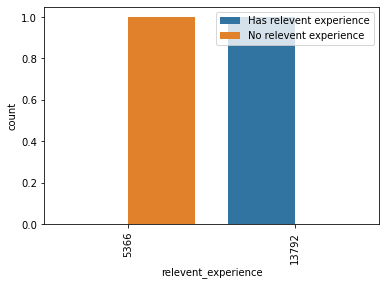

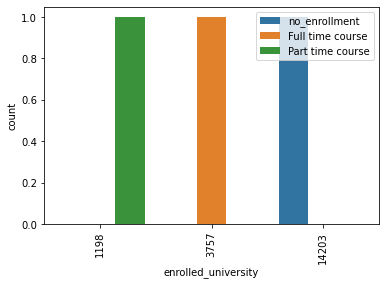

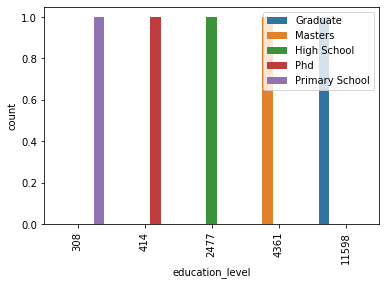

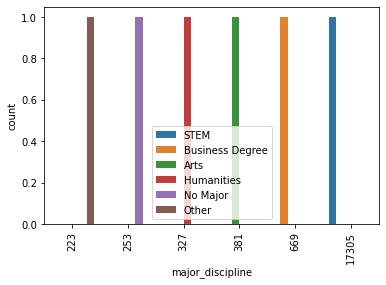

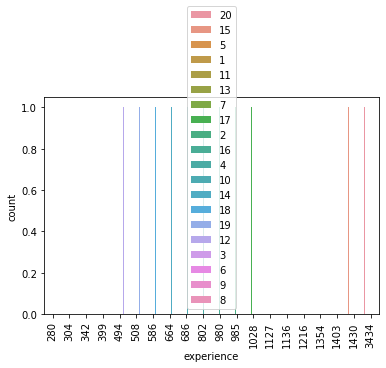

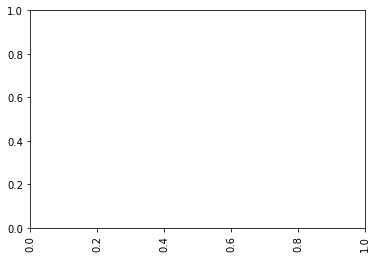

In [312]:
#Visualising Categorical data 

for i in range(len(hist_features)):

    plt.xticks(rotation = 'vertical')
    if(i < (len(hist_features)-2)):
        sns.countplot(x =df_train1[hist_feat[i]].value_counts() , hue = df_train1[hist_feat[i]].unique(), data = df_train1)
        plt.figure()

In [21]:
from sklearn.preprocessing import MinMaxScaler 

scaler = MinMaxScaler()

X = df_train1.copy()

X['exp_scale'] = scaler.fit_transform(X[['experience']])

X.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,...,EU_0,rel_exp_1,rel_exp_0,mj_dp_A,mj_dp_B,mj_dp_H,mj_dp_N,mj_dp_O,mj_dp_S,exp_scale
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,20,NaN,...,1,1,0,0,0,0,0,0,1,1.000000
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,...,1,0,1,0,0,0,0,0,1,0.736842
2,11561,city_21,0.624,Male,No relevent experience,Full time course,Graduate,STEM,5,NaN,...,0,0,1,0,0,0,0,0,1,0.210526
3,33241,city_115,0.789,Male,No relevent experience,no_enrollment,Graduate,Business Degree,1,NaN,...,1,0,1,0,1,0,0,0,0,0.000000
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,20,50-99,...,1,1,0,0,0,0,0,0,1,1.000000


In [22]:
X['company_size'].value_counts()

50-99        3083
100-500      2571
10000+       2019
10/49        1471
1000-4999    1328
<10          1308
500-999       877
5000-9999     563
Name: company_size, dtype: int64

In [23]:
X['company_size'] = X['company_size'].str.replace('10/49','10-49')

X['company_size'].isna().value_counts()

False    13220
True      5938
Name: company_size, dtype: int64

In [24]:
X['company_size'] = X['company_size'].str.replace('50-99','75')
X['company_size'] = X['company_size'].str.replace('100-500','250')
X['company_size'] = X['company_size'].replace('10000+','7500')
X['company_size'] = X['company_size'].str.replace('10-49','25')
X['company_size'] = X['company_size'].str.replace('1000-4999','2500')
X['company_size'] = X['company_size'].str.replace('<10','5')
X['company_size'] = X['company_size'].str.replace('500-999','750')
X['company_size'] = X['company_size'].str.replace('5000-9999','7500')

X['company_size'].value_counts()

75      3083
7500    2582
250     2571
25      1471
2500    1328
5       1308
750      877
Name: company_size, dtype: int64

In [25]:
X['compsize_scale'] = scaler.fit_transform(X[['company_size']])

X.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,...,rel_exp_1,rel_exp_0,mj_dp_A,mj_dp_B,mj_dp_H,mj_dp_N,mj_dp_O,mj_dp_S,exp_scale,compsize_scale
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,20,NaN,...,1,0,0,0,0,0,0,1,1.000000,NaN
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,75,...,0,1,0,0,0,0,0,1,0.736842,0.00934
2,11561,city_21,0.624,Male,No relevent experience,Full time course,Graduate,STEM,5,NaN,...,0,1,0,0,0,0,0,1,0.210526,NaN
3,33241,city_115,0.789,Male,No relevent experience,no_enrollment,Graduate,Business Degree,1,NaN,...,0,1,0,1,0,0,0,0,0.000000,NaN
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,20,75,...,1,0,0,0,0,0,0,1,1.000000,0.00934


In [26]:
X = X.drop('company_type', axis=1)

X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  19158 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     19158 non-null  object 
 6   education_level         19158 non-null  object 
 7   major_discipline        19158 non-null  object 
 8   experience              19158 non-null  object 
 9   company_size            13220 non-null  object 
 10  last_new_job            18735 non-null  object 
 11  training_hours          19158 non-null  int64  
 12  target                  19158 non-null  float64
 13  F                       19158 non-null  uint8  
 14  M                       19158 non-null

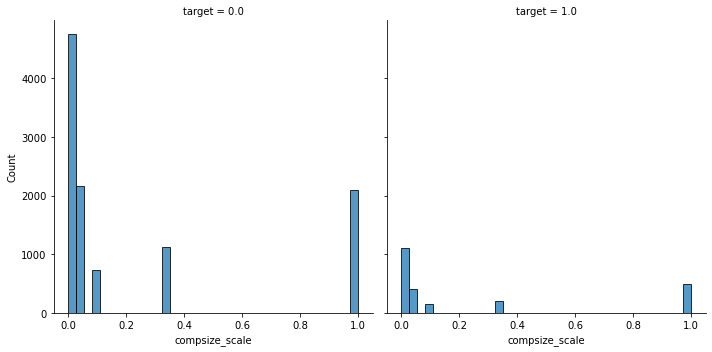

In [27]:
#checking correlation between companysize and target - for NA values fill

cr_df = X[['compsize_scale','target']]

sns.displot(data = cr_df, x = 'compsize_scale',col='target')


In [28]:
cr_df.describe()

,compsize_scale,target
count,13220.000000,19158.000000
mean,0.244176,0.249348
std,0.384338,0.432647
min,0.000000,0.000000
25%,0.009340,0.000000
50%,0.032688,0.000000
75%,0.332889,0.000000
max,1.000000,1.000000


In [29]:
c_list = X['compsize_scale'].dropna()
c_count = c_list.value_counts()
c_count

0.009340    3083
1.000000    2582
0.032688    2571
0.002668    1471
0.332889    1328
0.000000    1308
0.099400     877
Name: compsize_scale, dtype: int64

In [30]:
c_cnt_dct = dict(c_list.value_counts())
c_cnt_dct

{0.009339559706470981: 3083,
 1.0: 2582,
 0.03268845897264843: 2571,
 0.00266844563042028: 1471,
 0.33288859239492996: 1328,
 0.0: 1308,
 0.09939959973315543: 877}

In [31]:
c_scl = c_count/sum(c_count)
print(list(c_scl))

[0.2332072617246596, 0.19531013615733736, 0.19447806354009078, 0.11127080181543117, 0.10045385779122541, 0.09894099848714069, 0.06633888048411497]


In [32]:
c_unique = c_list.unique()
c_unique.mean()

0.21099780806251783

In [38]:
X['compsize_scale'] = X['compsize_scale'].fillna(c_unique.mean())

X['compsize_scale']

0        0.210998
1        0.009340
2        0.210998
3        0.210998
4        0.009340
           ...   
19153    0.210998
19154    0.210998
19155    0.009340
19156    0.099400
19157    0.210998
Name: compsize_scale, Length: 19158, dtype: float64

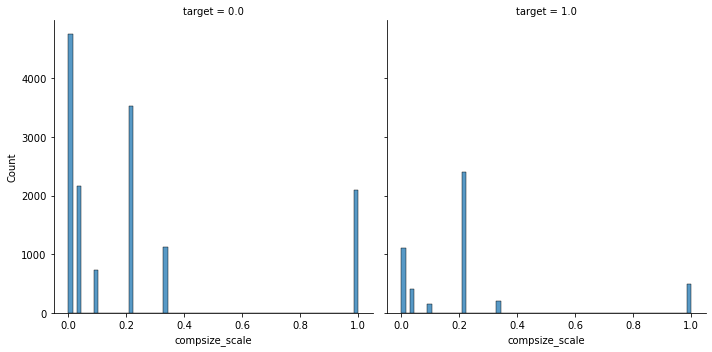

In [39]:
# Data Distribution after Fill NA - Company size
sns.displot(data = X, x = X['compsize_scale'],col = 'target')

In [40]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  19158 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     19158 non-null  object 
 6   education_level         19158 non-null  object 
 7   major_discipline        19158 non-null  object 
 8   experience              19158 non-null  object 
 9   company_size            13220 non-null  object 
 10  last_new_job            18735 non-null  object 
 11  training_hours          19158 non-null  int64  
 12  target                  19158 non-null  float64
 13  F                       19158 non-null  uint8  
 14  M                       19158 non-null

In [41]:
X['last_new_job'].value_counts()

1        8040
>4       3290
2        2900
never    2452
4        1029
3        1024
Name: last_new_job, dtype: int64

In [42]:
X['last_new_job'] = X['last_new_job'].replace('>4','4')
X['last_new_job'] = X['last_new_job'].replace('never','0')
X['last_new_job'].value_counts()

1    8040
4    4319
2    2900
0    2452
3    1024
Name: last_new_job, dtype: int64

In [43]:
X['last_new_job'] = X['last_new_job'].fillna(1)
X['last_new_job'].value_counts()

1    8040
4    4319
2    2900
0    2452
3    1024
1     423
Name: last_new_job, dtype: int64

In [44]:
X['lst_nj_scl'] = scaler.fit_transform(X[['last_new_job']])
X.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,...,rel_exp_0,mj_dp_A,mj_dp_B,mj_dp_H,mj_dp_N,mj_dp_O,mj_dp_S,exp_scale,compsize_scale,lst_nj_scl
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,20,NaN,...,0,0,0,0,0,0,1,1.000000,0.210998,0.25
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,75,...,1,0,0,0,0,0,1,0.736842,0.009340,1.00
2,11561,city_21,0.624,Male,No relevent experience,Full time course,Graduate,STEM,5,NaN,...,1,0,0,0,0,0,1,0.210526,0.210998,0.00
3,33241,city_115,0.789,Male,No relevent experience,no_enrollment,Graduate,Business Degree,1,NaN,...,1,0,1,0,0,0,0,0.000000,0.210998,0.00
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,20,75,...,0,0,0,0,0,0,1,1.000000,0.009340,1.00


In [45]:
X.columns

Index(['enrollee_id', 'city', 'city_development_index', 'gender',
       'relevent_experience', 'enrolled_university', 'education_level',
       'major_discipline', 'experience', 'company_size', 'last_new_job',
       'training_hours', 'target', 'F', 'M', 'O', 'EU_2', 'EU_1', 'EU_0',
       'rel_exp_1', 'rel_exp_0', 'mj_dp_A', 'mj_dp_B', 'mj_dp_H', 'mj_dp_N',
       'mj_dp_O', 'mj_dp_S', 'exp_scale', 'compsize_scale', 'lst_nj_scl'],
      dtype='object')

In [46]:
# Extracting One Hot encoded Scaled features 

feature = ['city_development_index','F', 'M', 'O', 'EU_2', 'EU_1', 'EU_0','rel_exp_1', 'rel_exp_0', 'mj_dp_A', 'mj_dp_B', 'mj_dp_H', 'mj_dp_N', 'mj_dp_O', 'mj_dp_S', 'exp_scale', 'compsize_scale', 'lst_nj_scl']

X_df = X[feature]

y = X['target']

X_df.describe()

,city_development_index,F,M,O,EU_2,EU_1,EU_0,rel_exp_1,rel_exp_0,mj_dp_A,mj_dp_B,mj_dp_H,mj_dp_N,mj_dp_O,mj_dp_S,exp_scale,compsize_scale,lst_nj_scl
count,19158.000000,19158.000000,19158.000000,19158.000000,19158.000000,19158.000000,19158.000000,19158.000000,19158.000000,19158.000000,19158.000000,19158.000000,19158.000000,19158.000000,19158.000000,19158.000000,19158.000000,19158.000000
mean,0.828848,0.064621,0.925410,0.009970,0.196106,0.062533,0.741361,0.719908,0.280092,0.013206,0.017069,0.034920,0.011640,0.019887,0.903278,0.469736,0.233893,0.451652
std,0.123362,0.245861,0.262736,0.099352,0.397060,0.242127,0.437898,0.449056,0.449056,0.114159,0.129530,0.183582,0.107262,0.139617,0.295587,0.340814,0.319631,0.342017
min,0.448000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.740000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.157895,0.009340,0.250000
50%,0.903000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.421053,0.210998,0.250000
75%,0.920000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.789474,0.210998,0.750000
max,0.949000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [47]:
y.describe()

count    19158.000000
mean         0.249348
std          0.432647
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: target, dtype: float64

##  Training the models and comparing performance metrics

In [383]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import f1_score,classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [219]:
# Logistic Reg model train with GridSearchCV

params = {'C':[10**-8,10**-5,10**-2,0.1,1,10,10^3]}

Logreg = GridSearchCV(LogisticRegression(),params,cv=5)

y_train = list(y)

Logreg.fit(X_df,y_train)

Logreg.best_score_

0.7653198361460647

In [220]:
Logreg.best_params_

{'C': 1}

In [226]:
# Logistic Reg model fit with ROC AUC Score
lg_reg = LogisticRegression(C=1)

lg_reg.fit(X_df,y_train)

y_pred = lg_reg.predict_proba(X_df)

roc_auc_score(y_train,y_pred[:,1])

0.7224191136640483

### ROC Curve - LogReg Model

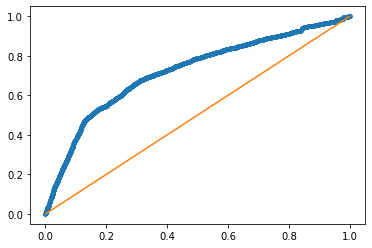

In [391]:
fpr_train_L, tpr_train_L, threshold_L = roc_curve(y_train, lg_reg.predict_proba(X_df)[:,1])

plt.plot(fpr_train_L,tpr_train_L,marker='.')
plt.plot([0,1],[0,1])

### Feature importance - Log Regression

In [316]:
#Feature Importance with Log Reg
importance = lg_reg.coef_[0]
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))

Feature: 0, Score: -5.63461
Feature: 1, Score: 0.04150
Feature: 2, Score: -0.13026
Feature: 3, Score: 0.09340
Feature: 4, Score: 0.25311
Feature: 5, Score: -0.10812
Feature: 6, Score: -0.14035
Feature: 7, Score: -0.21325
Feature: 8, Score: 0.21789
Feature: 9, Score: 0.14548
Feature: 10, Score: 0.15485
Feature: 11, Score: 0.00160
Feature: 12, Score: 0.00025
Feature: 13, Score: -0.09742
Feature: 14, Score: -0.20013
Feature: 15, Score: -0.35033
Feature: 16, Score: 0.09841
Feature: 17, Score: 0.25530


In [375]:
scoresL = np.linspace(1,2,18)
for i,v in enumerate(importance):
    scoresL[i] = v

scoresL_dict = dict(zip(feature,scoresL))

scoresL_dict

{'city_development_index': -5.634609486751795,
 'F': 0.04149597701763531,
 'M': -0.1302625657597124,
 'O': 0.0934016862412887,
 'EU_2': 0.2531077286384582,
 'EU_1': -0.10812380864268971,
 'EU_0': -0.14034882249669167,
 'rel_exp_1': -0.21325073347823192,
 'rel_exp_0': 0.21788583097757985,
 'mj_dp_A': 0.14548476315739306,
 'mj_dp_B': 0.1548460645190434,
 'mj_dp_H': 0.0016021766508658324,
 'mj_dp_N': 0.0002524163151141041,
 'mj_dp_O': -0.09741928191913134,
 'mj_dp_S': -0.20013104122401398,
 'exp_scale': -0.3503285242171557,
 'compsize_scale': 0.09840615980533428,
 'lst_nj_scl': 0.2552983561931045}

<BarContainer object of 18 artists>

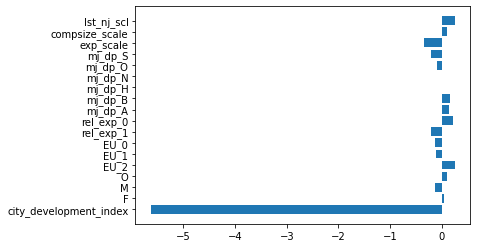

In [377]:
 plt.barh(list(scoresL_dict.keys()),list(scoresL_dict.values()))

In [51]:
# Decision Tree model train with GridSearchCV

from sklearn.tree import DecisionTreeClassifier

params = {'criterion': ['gini', 'entropy']}

DTC = GridSearchCV(DecisionTreeClassifier(),params, cv = 5)

DTC.fit(X_df,y)

DTC.best_score_

0.7270067447790223

In [326]:
DTC.best_params_

{'criterion': 'entropy'}

In [329]:
# DTC tree fit with ROC AUC Score

DT_CL = DecisionTreeClassifier(criterion = 'entropy')

DT_CL.fit(X_df,y)

roc_auc_score(y_train, DT_CL.predict_proba(X_df)[:,1])

0.9745344688669926

### ROC AUC Curve - Decision Tree

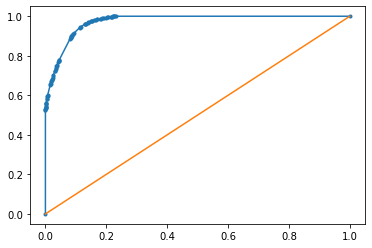

In [390]:
fpr_train_D, tpr_train_D, threshold_D = roc_curve(y_train, DT_CL.predict_proba(X_df)[:,1])

plt.plot(fpr_train_D,tpr_train_D,marker='.')
plt.plot([0,1],[0,1])

### Feature importance -  Decision Tree

In [331]:
importanceD = DT_CL.feature_importances_

for i,v in enumerate(importanceD):
    print('Feature: %0d, Score: %.5f' % (i,v))

Feature: 0, Score: 0.36460
Feature: 1, Score: 0.01177
Feature: 2, Score: 0.01442
Feature: 3, Score: 0.00383
Feature: 4, Score: 0.02167
Feature: 5, Score: 0.01518
Feature: 6, Score: 0.02356
Feature: 7, Score: 0.01478
Feature: 8, Score: 0.01623
Feature: 9, Score: 0.00574
Feature: 10, Score: 0.00504
Feature: 11, Score: 0.00954
Feature: 12, Score: 0.00441
Feature: 13, Score: 0.00660
Feature: 14, Score: 0.01345
Feature: 15, Score: 0.20139
Feature: 16, Score: 0.17283
Feature: 17, Score: 0.09497


In [355]:
scores = np.linspace(1,2,18)
for i,v in enumerate(importanceD):
    scores[i] = v
scores

score_dict = dict(zip(feature,scores))

score_dict

{'city_development_index': 0.3646034433604867,
 'F': 0.011771716767805931,
 'M': 0.01441940412473902,
 'O': 0.003826297618667648,
 'EU_2': 0.021669564791403955,
 'EU_1': 0.015175080100459449,
 'EU_0': 0.023555356811315088,
 'rel_exp_1': 0.014775320902594749,
 'rel_exp_0': 0.016227822360142054,
 'mj_dp_A': 0.005744601566506054,
 'mj_dp_B': 0.005042201981886671,
 'mj_dp_H': 0.009541303859842906,
 'mj_dp_N': 0.004405964541488442,
 'mj_dp_O': 0.006601887569412655,
 'mj_dp_S': 0.013450072109127843,
 'exp_scale': 0.2013916478193238,
 'compsize_scale': 0.1728292614733958,
 'lst_nj_scl': 0.09496905224140098}

<BarContainer object of 18 artists>

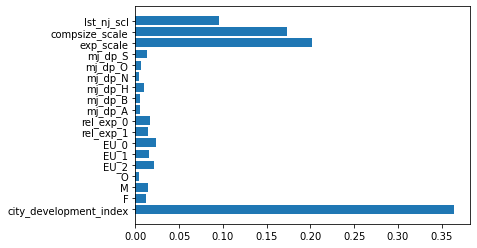

In [372]:
 plt.barh(list(score_dict.keys()),list(score_dict.values()))

## Test dataset wrangling

In [106]:
df_test1 = pd.read_csv('C:/Users/M.S.Chandrashekar/Desktop/Python/Kaggle_DS/archive/aug_test.csv')

df_test1.head()

df_test1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2129 entries, 0 to 2128
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             2129 non-null   int64  
 1   city                    2129 non-null   object 
 2   city_development_index  2129 non-null   float64
 3   gender                  1621 non-null   object 
 4   relevent_experience     2129 non-null   object 
 5   enrolled_university     2098 non-null   object 
 6   education_level         2077 non-null   object 
 7   major_discipline        1817 non-null   object 
 8   experience              2124 non-null   object 
 9   company_size            1507 non-null   object 
 10  company_type            1495 non-null   object 
 11  last_new_job            2089 non-null   object 
 12  training_hours          2129 non-null   int64  
dtypes: float64(1), int64(2), object(10)
memory usage: 216.4+ KB


In [378]:
df_test1.isna().any()

enrollee_id               False
city                      False
city_development_index    False
gender                    False
relevent_experience       False
enrolled_university       False
education_level            True
major_discipline          False
experience                False
company_size               True
company_type               True
last_new_job               True
training_hours            False
F                         False
M                         False
O                         False
EU_2                      False
EU_1                      False
EU_0                      False
rel_exp_1                 False
rel_exp_0                 False
mj_dp_A                   False
mj_dp_B                   False
mj_dp_H                   False
mj_dp_N                   False
mj_dp_O                   False
mj_dp_S                   False
dtype: bool

In [110]:
#One hot encoding - Gender
df_test1['gender'] = df_test1['gender'].fillna('Male')
df_test1[['F','M','O']] = pd.get_dummies(df_test1['gender'])


F  M  O
0  1  0    1968
1  0  0     137
0  0  1      24
dtype: int64

In [112]:
#Fill NAs - Enrollment University

df_test1['enrolled_university'].isna().value_counts()

df_test1['enrolled_university'] = df_test1['enrolled_university'].fillna('no_enrollment')

df_test1['enrolled_university'].value_counts()

no_enrollment       1550
Full time course     435
Part time course     144
Name: enrolled_university, dtype: int64

In [113]:
#One hot encoding - enrolled Univ

df_test1[['EU_2','EU_1','EU_0']] = pd.get_dummies(df_test1['enrolled_university'])

df_test1.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,F,M,O,EU_2,EU_1,EU_0
0,32403,city_41,0.827,Male,Has relevent experience,Full time course,Graduate,STEM,9,<10,NaN,1,21,0,1,0,1,0,0
1,9858,city_103,0.920,Female,Has relevent experience,no_enrollment,Graduate,STEM,5,NaN,Pvt Ltd,1,98,1,0,0,0,0,1
2,31806,city_21,0.624,Male,No relevent experience,no_enrollment,High School,NaN,<1,NaN,Pvt Ltd,never,15,0,1,0,0,0,1
3,27385,city_13,0.827,Male,Has relevent experience,no_enrollment,Masters,STEM,11,10/49,Pvt Ltd,1,39,0,1,0,0,0,1
4,27724,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,10000+,Pvt Ltd,>4,72,0,1,0,0,0,1


In [114]:
#One hot encoding - rel experience

df_test1[['rel_exp_1','rel_exp_0']] = pd.get_dummies(df_test1['relevent_experience'])

df_test1.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,...,last_new_job,training_hours,F,M,O,EU_2,EU_1,EU_0,rel_exp_1,rel_exp_0
0,32403,city_41,0.827,Male,Has relevent experience,Full time course,Graduate,STEM,9,<10,...,1,21,0,1,0,1,0,0,1,0
1,9858,city_103,0.920,Female,Has relevent experience,no_enrollment,Graduate,STEM,5,NaN,...,1,98,1,0,0,0,0,1,1,0
2,31806,city_21,0.624,Male,No relevent experience,no_enrollment,High School,NaN,<1,NaN,...,never,15,0,1,0,0,0,1,0,1
3,27385,city_13,0.827,Male,Has relevent experience,no_enrollment,Masters,STEM,11,10/49,...,1,39,0,1,0,0,0,1,1,0
4,27724,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,10000+,...,>4,72,0,1,0,0,0,1,1,0


In [115]:
df_test1['major_discipline'].value_counts()

STEM               1621
Humanities           80
Other                40
Business Degree      37
No Major             22
Arts                 17
Name: major_discipline, dtype: int64

In [116]:
#Fill NA's with min education level

df_test1['major_discipline'] = df_test1['major_discipline'].fillna('STEM')

df_test1['major_discipline'].value_counts()

STEM               1933
Humanities           80
Other                40
Business Degree      37
No Major             22
Arts                 17
Name: major_discipline, dtype: int64

In [117]:
df_test1['experience'].isna().value_counts()

False    2124
True        5
Name: experience, dtype: int64

In [118]:
df_test1['experience'] = df_test1['experience'].replace(np.nan,'1')

df_test1['experience'].value_counts()

>20    383
5      163
3      154
4      145
6      130
2      128
7      116
9      113
10      96
11      86
8       82
<1      74
16      68
1       61
15      59
14      55
13      54
12      52
17      36
19      29
18      26
20      19
Name: experience, dtype: int64

In [119]:
#Replace >20 and <1 to nearest exp value
df_test1['experience'] = df_test1['experience'].str.replace('>20','20')
df_test1['experience'] = df_test1['experience'].str.replace('<1','1')
df_test1['experience'].value_counts()

20    402
5     163
3     154
4     145
1     135
6     130
2     128
7     116
9     113
10     96
11     86
8      82
16     68
15     59
14     55
13     54
12     52
17     36
19     29
18     26
Name: experience, dtype: int64

### Test Data - Feature Scaling

In [169]:
from sklearn.preprocessing import MinMaxScaler 

scaler = MinMaxScaler()

X_test = df_test1.copy()

X_test['exp_scale'] = scaler.fit_transform(X_test[['experience']])

X_test.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,...,EU_0,rel_exp_1,rel_exp_0,mj_dp_A,mj_dp_B,mj_dp_H,mj_dp_N,mj_dp_O,mj_dp_S,exp_scale
0,32403,city_41,0.827,Male,Has relevent experience,Full time course,Graduate,STEM,9,<10,...,0,1,0,0,0,0,0,0,1,0.421053
1,9858,city_103,0.920,Female,Has relevent experience,no_enrollment,Graduate,STEM,5,NaN,...,1,1,0,0,0,0,0,0,1,0.210526
2,31806,city_21,0.624,Male,No relevent experience,no_enrollment,High School,STEM,1,NaN,...,1,0,1,0,0,0,0,0,1,0.000000
3,27385,city_13,0.827,Male,Has relevent experience,no_enrollment,Masters,STEM,11,10/49,...,1,1,0,0,0,0,0,0,1,0.526316
4,27724,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,20,10000+,...,1,1,0,0,0,0,0,0,1,1.000000


In [170]:
X_test['company_size'].value_counts()

50-99        338
100-500      318
10000+       217
10/49        172
<10          163
1000-4999    143
500-999       88
5000-9999     68
Name: company_size, dtype: int64

In [171]:
X_test['company_size'] = X_test['company_size'].str.replace('10/49','10-49')

X_test['company_size'].isna().value_counts()

False    1507
True      622
Name: company_size, dtype: int64

In [172]:
X_test['company_size'] = X_test['company_size'].str.replace('50-99','75')
X_test['company_size'] = X_test['company_size'].str.replace('100-500','250')
X_test['company_size'] = X_test['company_size'].replace('10000+','7500')
X_test['company_size'] = X_test['company_size'].str.replace('10-49','25')
X_test['company_size'] = X_test['company_size'].str.replace('1000-4999','2500')
X_test['company_size'] = X_test['company_size'].str.replace('<10','5')
X_test['company_size'] = X_test['company_size'].str.replace('500-999','750')
X_test['company_size'] = X_test['company_size'].str.replace('5000-9999','7500')

X_test['company_size'].value_counts()

75      338
250     318
7500    285
25      172
5       163
2500    143
750      88
Name: company_size, dtype: int64

In [173]:
X_test['compsize_scale'] = scaler.fit_transform(X_test[['company_size']])

X_test.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,...,rel_exp_1,rel_exp_0,mj_dp_A,mj_dp_B,mj_dp_H,mj_dp_N,mj_dp_O,mj_dp_S,exp_scale,compsize_scale
0,32403,city_41,0.827,Male,Has relevent experience,Full time course,Graduate,STEM,9,5,...,1,0,0,0,0,0,0,1,0.421053,0.000000
1,9858,city_103,0.920,Female,Has relevent experience,no_enrollment,Graduate,STEM,5,NaN,...,1,0,0,0,0,0,0,1,0.210526,NaN
2,31806,city_21,0.624,Male,No relevent experience,no_enrollment,High School,STEM,1,NaN,...,0,1,0,0,0,0,0,1,0.000000,NaN
3,27385,city_13,0.827,Male,Has relevent experience,no_enrollment,Masters,STEM,11,25,...,1,0,0,0,0,0,0,1,0.526316,0.002668
4,27724,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,20,7500,...,1,0,0,0,0,0,0,1,1.000000,1.000000


In [174]:
X_test = X_test.drop('company_type', axis=1)

X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2129 entries, 0 to 2128
Data columns (total 28 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             2129 non-null   int64  
 1   city                    2129 non-null   object 
 2   city_development_index  2129 non-null   float64
 3   gender                  2129 non-null   object 
 4   relevent_experience     2129 non-null   object 
 5   enrolled_university     2129 non-null   object 
 6   education_level         2077 non-null   object 
 7   major_discipline        2129 non-null   object 
 8   experience              2129 non-null   object 
 9   company_size            1507 non-null   object 
 10  last_new_job            2089 non-null   object 
 11  training_hours          2129 non-null   int64  
 12  F                       2129 non-null   uint8  
 13  M                       2129 non-null   uint8  
 14  O                       2129 non-null   

In [175]:
X_test['company_size'].value_counts()

75      338
250     318
7500    285
25      172
5       163
2500    143
750      88
Name: company_size, dtype: int64

In [176]:
X_test['company_size'].isna().value_counts()

False    1507
True      622
Name: company_size, dtype: int64

In [177]:
X_test['compsize_scale'] = scaler.fit_transform(X_test[['company_size']])

X_test.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,...,rel_exp_1,rel_exp_0,mj_dp_A,mj_dp_B,mj_dp_H,mj_dp_N,mj_dp_O,mj_dp_S,exp_scale,compsize_scale
0,32403,city_41,0.827,Male,Has relevent experience,Full time course,Graduate,STEM,9,5,...,1,0,0,0,0,0,0,1,0.421053,0.000000
1,9858,city_103,0.920,Female,Has relevent experience,no_enrollment,Graduate,STEM,5,NaN,...,1,0,0,0,0,0,0,1,0.210526,NaN
2,31806,city_21,0.624,Male,No relevent experience,no_enrollment,High School,STEM,1,NaN,...,0,1,0,0,0,0,0,1,0.000000,NaN
3,27385,city_13,0.827,Male,Has relevent experience,no_enrollment,Masters,STEM,11,25,...,1,0,0,0,0,0,0,1,0.526316,0.002668
4,27724,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,20,7500,...,1,0,0,0,0,0,0,1,1.000000,1.000000


In [178]:
X_test['compsize_scale'] = X_test['compsize_scale'].fillna(X_test['compsize_scale'].mean())

In [179]:
X_test['last_new_job'].value_counts()

1        884
>4       353
2        342
never    258
3        133
4        119
Name: last_new_job, dtype: int64

In [180]:
X_test['last_new_job'] = X_test['last_new_job'].replace('>4','4')
X_test['last_new_job'] = X_test['last_new_job'].replace('never','0')
X_test['last_new_job'].value_counts()

1    884
4    472
2    342
0    258
3    133
Name: last_new_job, dtype: int64

In [181]:
X_test['last_new_job'] = X_test['last_new_job'].fillna(1)
X_test['last_new_job'].value_counts()

1    884
4    472
2    342
0    258
3    133
1     40
Name: last_new_job, dtype: int64

In [182]:
X_test['lst_nj_scl'] = scaler.fit_transform(X_test[['last_new_job']])
X_test.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,...,rel_exp_0,mj_dp_A,mj_dp_B,mj_dp_H,mj_dp_N,mj_dp_O,mj_dp_S,exp_scale,compsize_scale,lst_nj_scl
0,32403,city_41,0.827,Male,Has relevent experience,Full time course,Graduate,STEM,9,5,...,0,0,0,0,0,0,1,0.421053,0.000000,0.25
1,9858,city_103,0.920,Female,Has relevent experience,no_enrollment,Graduate,STEM,5,NaN,...,0,0,0,0,0,0,1,0.210526,0.235807,0.25
2,31806,city_21,0.624,Male,No relevent experience,no_enrollment,High School,STEM,1,NaN,...,1,0,0,0,0,0,1,0.000000,0.235807,0.00
3,27385,city_13,0.827,Male,Has relevent experience,no_enrollment,Masters,STEM,11,25,...,0,0,0,0,0,0,1,0.526316,0.002668,0.25
4,27724,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,20,7500,...,0,0,0,0,0,0,1,1.000000,1.000000,1.00


In [183]:
#Fill NA's with min education level

X_test['major_discipline'] = X_test['major_discipline'].fillna('STEM')

X_test['major_discipline'].value_counts()

STEM               1933
Humanities           80
Other                40
Business Degree      37
No Major             22
Arts                 17
Name: major_discipline, dtype: int64

In [379]:
#One hot encoding - Major Discipline

X_test[['mj_dp_A','mj_dp_B','mj_dp_H','mj_dp_N','mj_dp_O','mj_dp_S']] = pd.get_dummies(X_test['major_discipline'])


In [393]:
#One hot encoding - enrolled univ

X_test[['EU_2','EU_1','EU_0']] = pd.get_dummies(X_test['enrolled_university'])

X_test.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,...,rel_exp_0,mj_dp_A,mj_dp_B,mj_dp_H,mj_dp_N,mj_dp_O,mj_dp_S,exp_scale,compsize_scale,lst_nj_scl
0,32403,city_41,0.827,Male,Has relevent experience,Full time course,Graduate,STEM,9,5,...,0,0,0,0,0,0,1,0.421053,0.000000,0.25
1,9858,city_103,0.920,Female,Has relevent experience,no_enrollment,Graduate,STEM,5,NaN,...,0,0,0,0,0,0,1,0.210526,0.235807,0.25
2,31806,city_21,0.624,Male,No relevent experience,no_enrollment,High School,STEM,1,NaN,...,1,0,0,0,0,0,1,0.000000,0.235807,0.00
3,27385,city_13,0.827,Male,Has relevent experience,no_enrollment,Masters,STEM,11,25,...,0,0,0,0,0,0,1,0.526316,0.002668,0.25
4,27724,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,20,7500,...,0,0,0,0,0,0,1,1.000000,1.000000,1.00


In [186]:
X_test.columns

Index(['enrollee_id', 'city', 'city_development_index', 'gender',
       'relevent_experience', 'enrolled_university', 'education_level',
       'major_discipline', 'experience', 'company_size', 'last_new_job',
       'training_hours', 'F', 'M', 'O', 'EU_2', 'EU_1', 'EU_0', 'rel_exp_1',
       'rel_exp_0', 'mj_dp_A', 'mj_dp_B', 'mj_dp_H', 'mj_dp_N', 'mj_dp_O',
       'mj_dp_S', 'exp_scale', 'compsize_scale', 'lst_nj_scl'],
      dtype='object')

In [187]:
# Extracting One Hot encoded Scaled features 

feature = ['city_development_index','F', 'M', 'O', 'EU_2', 'EU_1', 'EU_0','rel_exp_1', 'rel_exp_0', 'mj_dp_A', 'mj_dp_B', 'mj_dp_H', 'mj_dp_N',
       'mj_dp_O', 'mj_dp_S','exp_scale', 'compsize_scale', 'lst_nj_scl']

X_df_test = X_test[feature]

X_df_test.describe()

,city_development_index,F,M,O,EU_2,EU_1,EU_0,rel_exp_1,rel_exp_0,mj_dp_A,mj_dp_B,mj_dp_H,mj_dp_N,mj_dp_O,mj_dp_S,exp_scale,compsize_scale,lst_nj_scl
count,2129.000000,2129.000000,2129.000000,2129.000000,2129.000000,2129.000000,2129.000000,2129.000000,2129.000000,2129.000000,2129.000000,2129.000000,2129.000000,2129.000000,2129.000000,2129.000000,2129.000000,2129.000000
mean,0.824984,0.064349,0.924378,0.011273,0.204321,0.067637,0.728041,0.715829,0.284171,0.007985,0.017379,0.037576,0.010333,0.018788,0.907938,0.470446,0.235807,0.457374
std,0.125074,0.245432,0.264455,0.105599,0.403300,0.251182,0.445073,0.451125,0.451125,0.089022,0.130710,0.190214,0.101151,0.135808,0.289181,0.344337,0.320281,0.339099
min,0.448000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.698000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.157895,0.009340,0.250000
50%,0.903000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.421053,0.099400,0.250000
75%,0.920000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.789474,0.235807,0.750000
max,0.949000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Predict best model with test data

In [239]:
#Applying Decision Tree with best ROC AUC curve

y_pred = DTC.predict(X_df_test)

print(y_pred,'\n', y_pred.size)

[0. 1. 1. ... 0. 0. 0.] 
 2129
